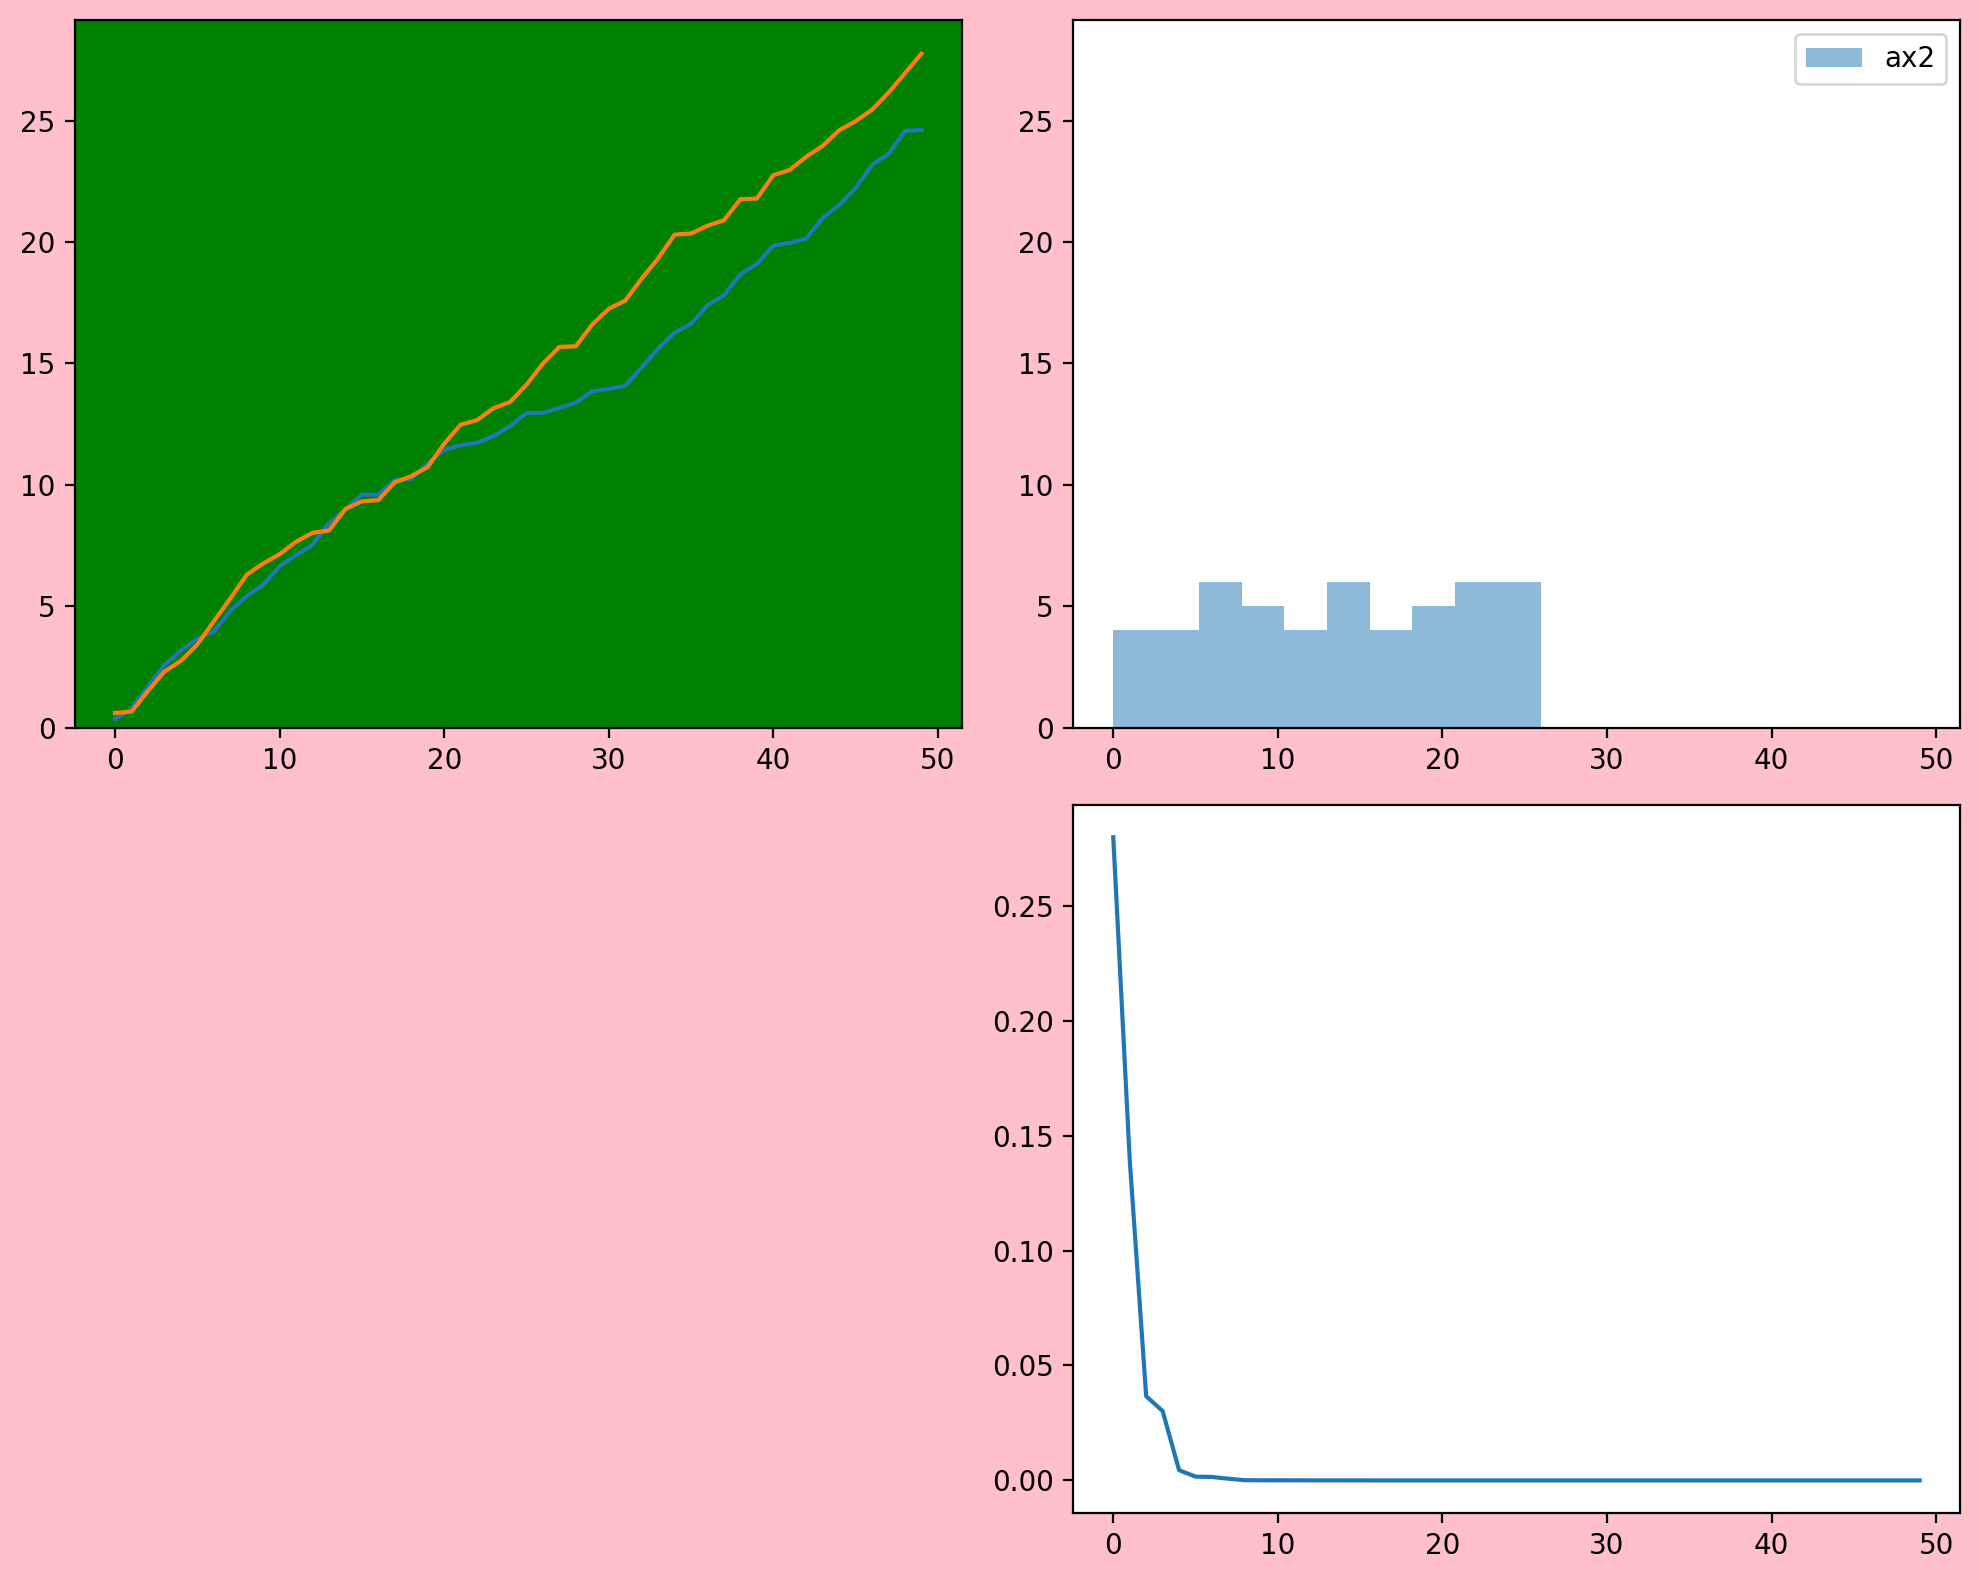

In [8]:
import  numpy as np
import  pandas as pd
import  matplotlib.pyplot as plt

# 创建子图方法一:Figure.add_subplot
fig = plt.figure(figsize=(10, 8), facecolor='pink', dpi=200) # Create a new figure.
'''
figsize : 2-tuple of floats, default: rcParams["figure.figsize"]
    Figure dimension (width, height) in inches.

dpi : float, default: rcParams["figure.dpi"]
    Dots per inch.

facecolor : default: rcParams["figure.facecolor"]
    The figure patch facecolor.
'''

ax1 = fig.add_subplot(2, 2, 1) 
ax1.set_fc('g') # Set the facecolor of the Axes.
ax1.plot(np.random.rand(50).cumsum()) 
ax1.plot(np.random.rand(50).cumsum(), label='ax1') 

ax2 = fig.add_subplot(2, 2, 2, sharex=ax1, sharey=ax1) # 共享ax1的x,y刻度
ax2.hist(np.random.rand(50).cumsum(), alpha=0.5, label='ax2')
ax2.legend()

ax4 = fig.add_subplot(224) # 第2行右图
ax4.plot(np.random.rand(50).cumprod())
plt.tight_layout() # 自动调整子图参数,使之填充整个图像区域

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


(array([52., 51., 49., 53., 47., 48., 51., 51., 48., 50.]),
 array([  0.30443106,  26.07206949,  51.83970792,  77.60734634,
        103.37498477, 129.1426232 , 154.91026162, 180.67790005,
        206.44553848, 232.21317691, 257.98081533]),
 <BarContainer object of 10 artists>)

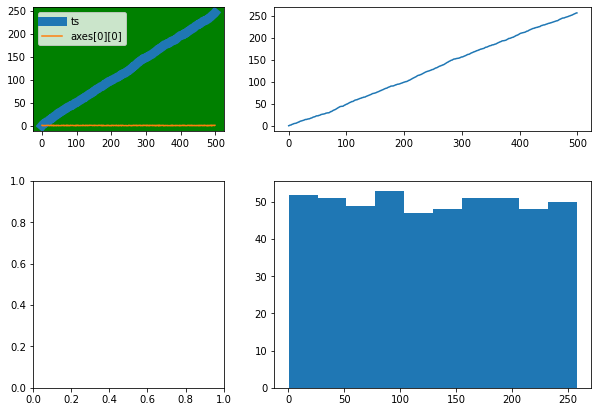

In [9]:
# 创建子图方法二:pyplot.subplots
grid_kws = {"height_ratios": (.9, 1.5), "width_ratios": (.9, 1.5), "hspace": .3}
fig1, axes = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw=grid_kws)

'''
gridspec_kw : dict, optional
    Dict with keywords passed to the GridSpec constructor used to create the grid the subplots are placed on.

    class matplotlib.gridspec.GridSpec（nrows，ncols，figure = None，left = None，bottom = None，
                                        right = None，top = None，wspace = None，hspace = None，
                                        width_ratios = None，height_ratios = None ） 
'''
print(axes) # 子图对象组成的列表(二维)
ts = pd.Series(np.random.rand(500).cumsum())
ts2 = pd.Series(np.random.rand(500))

axes[0][0].plot(ts, label='ts', linewidth=9)
axes[0][0].set_fc('g') # Set the facecolor of the Axes.
axes[0][0].plot(ts2, label='axes[0][0]')
axes[0][0].legend() 

axes[0][1].plot(np.random.rand(500).cumsum()) 
axes[1][1].hist(np.random.rand(500).cumsum()) 

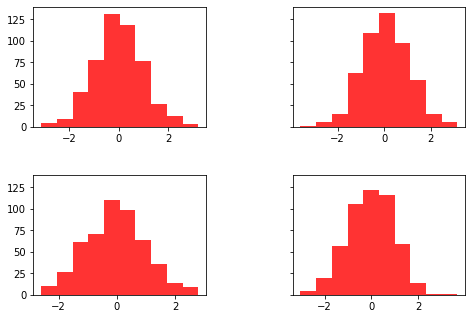

In [10]:
fig2, axes1 = plt.subplots(2, 2, sharey='all')
'''
sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (sharex) or y (sharey) axes:
        True or 'all': x- or y-axis will be shared among all subplots.
        False or 'none': each subplot x- or y-axis will be independent.
        'row': each subplot row will share an x- or y-axis.
        'col': each subplot column will share an x- or y-axis.
'''
for i in range(2):
    for j in range(2):
        axes1[i][j].hist(np.random.randn(500), color='r', alpha=0.8)
'''
subplots_adjust:调整子图布局(savefig保存图片时可能需要进行设置)
(left, bottom):图像左下角点的坐标
(top, right):图像右上角点的坐标
wspace:the amount of width reserved for space between subplots,expressed as a fraction of the average axis width
hspace:the amount of height reserved for space between subplots,expressed as a fraction of the average axis height
'''
fig2.subplots_adjust(left  = 0, right = 1, bottom = 0,
                    top = 1, wspace=0.5, hspace=0.4) 

Bbox(x0=0.13, y0=0.07999999999999996, x1=0.999, y1=0.999)


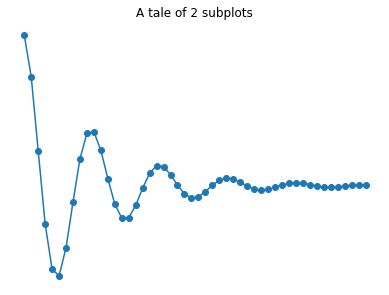

In [15]:
# 创建子图方法三:pyplot.subplot
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)
fig3 = plt.figure()

ax_1 =  plt.subplot(111)
ax_1.plot(x1, y1, 'o-')
ax_1.set_title('A tale of 2 subplots')
ax_1.set_ylabel('Damped oscillation')

fig3.subplots_adjust(bottom=0.08, top=0.999, left=0.13, right=0.999) 
print(ax_1.get_position()) # Get a copy of the axes rectangle as a Bbox.

ax_1.axis('auto')
'''
Possible values:
Value	    Description
'on'	    Turn on axis lines and labels.axis lines and labels.
'off'	    Turn off axis lines and labels.axis lines and labels.
'equal'	    Set equal scaling (i.e., make circles circular) by changing axis limits.axis limits.
'scaled'	Set equal scaling (i.e., make circles circular) by changing dimensions of the plot box.
'tight'	    Set limits just large enough to show all data.
'auto'	    Automatic scaling (fill plot box with data).
'image'	'   scaled' with axis limits equal to data limits.axis limits equal to data limits.
'square'	Square plot; similar to 'scaled', but initially forcing xmax-xmin = ymax-ymin.
'''
fig3.savefig('E:/GitHubProjects/MLNote/E_plot/matplotlib/基础知识/picture_1.jpg',
           dpi=500, facecolor='yellow')